1.
Cree una función llamada myint pero que a partir de un número binario con base de 16 bits encuentre el entero correspondiente. Compare su resultado con int(0b1000011100001)

In [ ]:
def myint(numero_binario):
    numero_decimal = 0

    for posicion, digito in enumerate(numero_binario[::-1]): #[::-1] invierta la cadena. enumerate nos da la posición y el dígito de 0 a 1
        numero_decimal += int(digito)*2**posicion #Se convierte el dígito a entero y se multiplica por 2**posición del dígito, luego eso se va sumando a la variable numero_decimal
    return numero_decimal

numero_binario = "1000011100001"
numero_decimal = myint(numero_binario)
print(f'El número decimal es: {numero_decimal}')
print(f'Con int nos da: {int(0b1000011100001)}')

El número decimal es: 4321
Con int nos da: 4321


# 2.
Generar una función llamada `number64` para flotantes de precisión doble (64bits) donde a partir de un número binario encuentre el valor real. Compruebe su solución usando

```
number64("0100000000111011100100001111111111111111111111111111111111111111")
```

In [ ]:
def number64(cadena64):
    """
    Convierte una cadena binaria de 64 bits a un número flotante (IEEE 754 doble precisión).
    """
    if len(cadena64) != 64:
        raise ValueError("La cadena debe tener exactamente 64 caracteres.")

    # Separar los campos
    signo_bit = int(cadena64[0])
    exponente_bits = cadena64[1:12]
    fraccion_bits = cadena64[12:]

    # Calcular el signo
    signo = (-1) ** signo_bit

    # Convertir el exponente de binario a decimal
    exponente_decimal = int(exponente_bits, 2)
    sesgo = 1023

    # Casos especiales: infinito y NaN
    if exponente_decimal == 2047:
        if '1' in fraccion_bits:
            return float('nan')
        else:
            return float('inf') * signo

    # Construir la mantisa
    if exponente_decimal == 0:
        # Número denormalizado (no tiene 1 implícito)
        mantisa = 0.0
        for i in range(52):
            mantisa += int(fraccion_bits[i]) * 2 ** (-(i + 1))
        exponente_real = 1 - sesgo
    else:
        # Número normalizado (tiene 1 implícito)
        mantisa = 1.0
        for i in range(52):
            mantisa += int(fraccion_bits[i]) * 2 ** (-(i + 1))
        exponente_real = exponente_decimal - sesgo

    # Calcular el valor final
    valor = signo * mantisa * (2 ** exponente_real)
    return valor

cadena_binaria = "0100000000111011100100001111111111111111111111111111111111111111"
resultado = number64(cadena_binaria)
print("Resultado:", resultado)

Resultado: 27.566406249999996


# 3. Aproximación de $\pi$

La serie de Maclaurin para la función tangente inversa converge en $-1 < x \leq 1$ y está dada por:

$$
\arctan x = \lim_{n \to \infty} P_n(x) = \lim_{n \to \infty} \sum_{i=1}^n (-1)^{i+1} \frac{x^{2i-1}}{2i-1}
$$

- **Aproximación básica**
    - Utilizando el hecho de que $\tan(\pi/4) = 1$, implemente en Python una función que calcule $4P_n(1)$ y determina el número mínimo de términos $n$ necesarios para que $|4P_n(1) - \pi| < 10^{-3}$. Compare su resultado con el valor de $\pi$ de la librería math.
    - Requiriendo que el valor de $\pi$ esté dentro de un error de $10^{-4}$. ¿Cuántos términos de la serie se necesitaría sumar para obtener esta precisión? Implemente una solución en Python para encontrar este valor.
- **Mejora de la convergencia**
    El método anterior puede mejorarse significativamente usando la identidad:
    $$
    \frac{\pi}{4} = \arctan\left(\frac{1}{2}\right) + \arctan\left(\frac{1}{3}\right)
    $$
    - Implemente en Python una función que evalúe la serie para $\arctan(1/2)$ y $\arctan(1/3)$ por separado y luego las sume. Determine el número mínimo de términos necesarios para cada serie (pueden ser diferentes) para aproximar $\pi$ con un error menor a $10^{-3}$ y $10^{-6}$.

- **Método de alta precisión**
    Para obtener una convergencia aún más rápida, usamos la identidad:
    $$
    \frac{\pi}{4} = 4\arctan\left(\frac{1}{5}\right) - \arctan\left(\frac{1}{239}\right)
    $$
    Desarrolle un programa en Python que implemente esta fórmula y determine:
    - El número mínimo de términos necesarios en cada serie para aproximar $\pi$ con error menor a $10^{-3}$ y $10^{-6}$.
    - Compare el rendimiento (número de términos requeridos) con los métodos anteriores.



In [ ]:
#Aproximación básica
import numpy as np
import math
import matplotlib.pyplot as plt
def P_n(tolerancia):
  suma = 0
  i = 1
  aproximaciones = []
  while True:
    termino = ((-1)**(i+1))/((2*i)-1)
    suma += termino
    pi_aproximado = 4 * suma
    aproximaciones.append(suma)
    if abs(pi_aproximado - math.pi)<tolerancia:
        break
    i += 1
  return pi_aproximado, i
pi, iteraciones = P_n(1e-3)
print(f'El valor de P_n(1) es {pi} y el número de terminos necesariones fueron: {iteraciones}' )
print(f'El valor arrojado por math es: {math.pi}')
pi_2, iteraciones_2 = P_n(1e-4)
print(f'Para una tolerancia de 1e-4 el valor arrojado es {pi_2} y las iteraciones son {iteraciones_2}')

El valor de P_n(1) es 3.140592653839794 y el número de terminos necesariones fueron: 1000
El valor arrojado por math es: 3.141592653589793


In [2]:
# Mejora de la convergencia
def arctan(x, tolerancia):
    suma_2 = 0
    termino_anterior = 0
    i = 1
    while True:
        termino = ((-1)**(i+1)) * (x**((2*i)-1))/((2*i)-1)
        suma_2 += termino
        if abs(termino - termino_anterior) < tolerancia:
            break
        termino_anterior = termino
        i += 1
    return suma_2, i

# Cálculo de arctan(1/2) y arctan(1/3)
valor_1, n1 = arctan(1/2, 1e-3)
valor_2, n2 = arctan(1/3, 1e-3)

# Aproximación de pi
pi_3 = 4 * (valor_1 + valor_2)
print(f'El valor arrojado para pi en esta aproximación es {pi_3}')
print(f'Términos usados: arctan(1/2): {n1}, arctan(1/3): {n2}')


El valor arrojado para pi en esta aproximación es 3.141541060498429
Términos usados: arctan(1/2): 6, arctan(1/3): 4


In [4]:
#Método de alta presición
import math

# Tolerancia 10^-3
tolerancia = 1e-3

# Evaluamos cada arctan con su propia serie
arctan_1_5, n1 = arctan(1/5, tolerancia)
arctan_1_239, n2 = arctan(1/239, tolerancia)

# Fórmula de Machin: pi/4 = 4*arctan(1/5) - arctan(1/239)
pi_aprox = 4 * (4 * arctan_1_5 - arctan_1_239)

# Mostrar resultados
print(f"π aproximado: {pi_aprox}")
print(f"Error absoluto: {abs(pi_aprox - math.pi)}")
print(f"Número de términos usados: arctan(1/5): {n1}, arctan(1/239): {n2}")

π aproximado: 3.1415917721821773
Error absoluto: 8.814076157825923e-07
Número de términos usados: arctan(1/5): 4, arctan(1/239): 3


Claramente el último método toma menos iteraciones que el segundo y muchisimas menos que el primero.

# 4. Serie Exponencial
Considere la serie para $e^{-x}$

$$
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
$$

- Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

$$
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
$$

- Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.

- Compruebe si se obtiene una mejor precisión siendo ingenioso y usando $e^{−x} = \frac{1}{e^x}$ para valores grandes de $x$. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.


- Incrementando progresivamente $x$ de 1 a 10, y luego de 10 a 100, use el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.


- Realice una serie de gráficos del error versus $N$ para diferentes valores de $x$.

In [5]:
def calcular_expx_neg(x, tol=1e-7):
    suma = 0.0
    n = 0
    termino = 1.0  # primer término (n=0): (-1)^0 * x^0 / 0! = 1
    suma += termino

    while True:
        n += 1
        # Calcular término n usando término anterior para eficiencia:
        # término_n = término_(n-1) * (-x) / n
        termino *= (-x) / n

        # Si el siguiente término es suficientemente pequeño, rompemos
        if abs(termino) < tol * abs(suma):
            break

        suma += termino

    return suma, n

# Probamos para x en [0, 1]
x_values = np.linspace(0, 1, 11)

print("x\tSerie\t\tN\tError abs con np.exp(-x)")
for x in x_values:
    serie_val, N = calcular_expx_neg(x)
    exacto = np.exp(-x)
    error = abs(serie_val - exacto)
    print(f"{x:.2f}\t{serie_val:.10f}\t{N}\t{error:.2e}")


x	Serie		N	Error abs con np.exp(-x)
0.00	1.0000000000	1	0.00e+00
0.10	0.9048375000	5	8.20e-08
0.20	0.8187307556	7	2.48e-09
0.30	0.7408182625	7	4.18e-08
0.40	0.6703200305	8	1.56e-08
0.50	0.6065306648	9	5.12e-09
0.60	0.5488116623	9	2.62e-08
0.70	0.4965852965	10	7.32e-09
0.80	0.4493289365	10	2.76e-08
0.90	0.4065696671	11	7.31e-09
1.00	0.3678794643	11	2.31e-08


In [6]:
x = 10
tol = 1e-7

terminos = []
suma_parcial = 0.0
n = 0
termino = 1.0  # término para n=0

while True:
    suma_parcial += termino
    terminos.append(termino)

    # siguiente término
    n += 1
    termino *= (-x) / n

    # condición para parar
    if abs(termino) <= tol * abs(suma_parcial):
        break

# Imprimir los términos y la suma parcial para observar cancelaciones
print(f"x = {x}")
print(f"N = {n}")
print("n\tTérmino\t\t\tSuma parcial")
suma = 0
for i, t in enumerate(terminos):
    suma += t
    print(f"{i}\t{t:.5e}\t{suma:.5e}")

# Mostrar la cancelación alrededor de n ~ x - 1 = 9
print("\nCancelaciones alrededor de n = 9:")
for i in range(7, 12):
    print(f"n={i}, término = {terminos[i]:.5e}")

x = 10
N = 46
n	Término			Suma parcial
0	1.00000e+00	1.00000e+00
1	-1.00000e+01	-9.00000e+00
2	5.00000e+01	4.10000e+01
3	-1.66667e+02	-1.25667e+02
4	4.16667e+02	2.91000e+02
5	-8.33333e+02	-5.42333e+02
6	1.38889e+03	8.46556e+02
7	-1.98413e+03	-1.13757e+03
8	2.48016e+03	1.34259e+03
9	-2.75573e+03	-1.41314e+03
10	2.75573e+03	1.34259e+03
11	-2.50521e+03	-1.16262e+03
12	2.08768e+03	9.25052e+02
13	-1.60590e+03	-6.80852e+02
14	1.14707e+03	4.66222e+02
15	-7.64716e+02	-2.98494e+02
16	4.77948e+02	1.79454e+02
17	-2.81146e+02	-1.01692e+02
18	1.56192e+02	5.45000e+01
19	-8.22064e+01	-2.77063e+01
20	4.11032e+01	1.33969e+01
21	-1.95729e+01	-6.17608e+00
22	8.89679e+00	2.72072e+00
23	-3.86817e+00	-1.14745e+00
24	1.61174e+00	4.64284e-01
25	-6.44695e-01	-1.80411e-01
26	2.47960e-01	6.75483e-02
27	-9.18369e-02	-2.42886e-02
28	3.27989e-02	8.51032e-03
29	-1.13100e-02	-2.79965e-03
30	3.76999e-03	9.70342e-04
31	-1.21613e-03	-2.45783e-04
32	3.80039e-04	1.34256e-04
33	-1.15163e-04	1.90923e-05
34	3.38716e-05	5.296

In [7]:
def serie_exp_neg(x, tol=1e-7):
    """Calcula e^{-x} usando la serie con signos alternados."""
    termino = 1.0
    suma = termino
    n = 0
    while True:
        n += 1
        termino *= (-x) / n
        if abs(termino) < tol * abs(suma):
            break
        suma += termino
    return suma, n

def serie_exp_pos(x, tol=1e-7):
    """Calcula e^{x} usando la serie de términos positivos."""
    termino = 1.0
    suma = termino
    n = 0
    while True:
        n += 1
        termino *= x / n
        if abs(termino) < tol * abs(suma):
            break
        suma += termino
    return suma, n

def calcular_exp_neg_mejorado(x, tol=1e-7):
    """Calcula e^{-x} usando la identidad para mejorar precisión."""
    if x <= 1:
        return serie_exp_neg(x, tol)
    else:
        exp_pos, n = serie_exp_pos(x, tol)
        return 1/exp_pos, n

# Comparar para un x grande
x = 10

val1, n1 = serie_exp_neg(x)
val2, n2 = calcular_exp_neg_mejorado(x)

print(f"x = {x}")
print(f"Serie directa e^(-x): {val1:.10e}, términos usados: {n1}")
print(f"Serie mejorada usando 1/e^x: {val2:.10e}, términos usados: {n2}")
print(f"Valor exacto con np.exp(-x): {np.exp(-x):.10e}")

error_directo = abs(val1 - np.exp(-x))
error_mejorado = abs(val2 - np.exp(-x))

print(f"Error serie directa: {error_directo:.3e}")
print(f"Error serie mejorada: {error_mejorado:.3e}")

x = 10
Serie directa e^(-x): 4.5399928173e-05, términos usados: 46
Serie mejorada usando 1/e^x: 4.5399933387e-05, términos usados: 31
Valor exacto con np.exp(-x): 4.5399929762e-05
Error serie directa: 1.590e-12
Error serie mejorada: 3.625e-12


In [8]:
def serie_exp_neg(x, tol=1e-7, max_iter=10000):
    termino = 1.0
    suma = termino
    n = 0
    while n < max_iter:
        n += 1
        termino *= (-x) / n
        if abs(termino) < tol * abs(suma):
            return suma, n, True
        suma += termino
    # Si llegó aquí, no convergió
    return suma, n, False

# Rango 1: x de 1 a 10 (paso 0.5)
x_vals_1 = np.arange(1, 10.1, 0.5)
# Rango 2: x de 10 a 100 (paso 5)
x_vals_2 = np.arange(10, 101, 5)

x_vals = np.concatenate((x_vals_1, x_vals_2))

errores = []
terminos_usados = []
convergencias = []

for x in x_vals:
    val_serie, n_ter, converg = serie_exp_neg(x)
    val_exact = np.exp(-x)
    error = abs(val_serie - val_exact)

    errores.append(error)
    terminos_usados.append(n_ter)
    convergencias.append(converg)

# Imprimir resultados resumidos
print("x\tError absoluto\tTérminos usados\tConvergencia")
for x, err, n, conv in zip(x_vals, errores, terminos_usados, convergencias):
    print(f"{x:.1f}\t{err:.3e}\t\t{n}\t\t{conv}")

x	Error absoluto	Términos usados	Convergencia
1.0	2.311e-08		11		True
1.5	3.043e-09		14		True
2.0	2.801e-09		16		True
2.5	2.007e-09		18		True
3.0	1.253e-09		20		True
3.5	7.193e-10		22		True
4.0	3.908e-10		24		True
4.5	2.045e-10		26		True
5.0	1.041e-10		28		True
5.5	2.822e-10		29		True
6.0	1.357e-10		31		True
6.5	6.473e-11		33		True
7.0	3.067e-11		35		True
7.5	1.444e-11		37		True
8.0	6.739e-12		39		True
8.5	1.529e-11		40		True
9.0	7.229e-12		42		True
9.5	3.421e-12		44		True
10.0	1.590e-12		46		True
10.0	1.590e-12		46		True
15.0	7.670e-12		64		True
20.0	4.086e-09		81		True
25.0	8.181e-07		92		True
30.0	6.103e-06		104		True
35.0	2.253e-03		113		True
40.0	3.117e-01		122		True
45.0	2.223e+02		130		True
50.0	2.042e+03		141		True
55.0	1.717e+06		148		True
60.0	7.227e+08		156		True
65.0	3.121e+10		165		True
70.0	4.594e+12		173		True
75.0	2.970e+15		180		True
80.0	2.451e+17		188		True
85.0	2.450e+19		197		True
90.0	5.866e+21		204		True
95.0	1.022e+24		211		True
100.0	8.145e+25		220		True


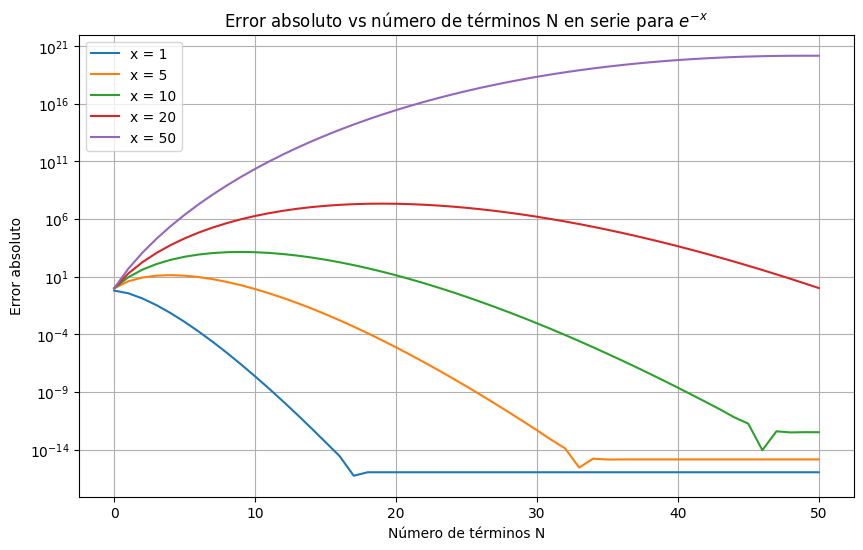

In [11]:
import matplotlib.pyplot as plt
def calcular_serie_parcial_exp_neg(x, N_max):
    """Calcula la suma parcial de la serie e^{-x} hasta N_max términos."""
    suma = 0.0
    terminos = []
    for n in range(N_max + 1):
        termino = ((-x)**n) / math.factorial(n)
        suma += termino
        terminos.append(suma)
    return terminos

# Valores de x para graficar
x_values = [1, 5, 10, 20, 50]
N_max = 50

plt.figure(figsize=(10, 6))

for x in x_values:
    sumas_parciales = calcular_serie_parcial_exp_neg(x, N_max)
    valores_exactos = np.exp(-x)

    errores = [abs(s - valores_exactos) for s in sumas_parciales]

    plt.plot(range(N_max + 1), errores, label=f"x = {x}")

plt.yscale('log')
plt.xlabel("Número de términos N")
plt.ylabel("Error absoluto")
plt.title("Error absoluto vs número de términos N en serie para $e^{-x}$")
plt.legend()
plt.grid(True)
plt.show()

5.
Supongamos que tenemos una función
 y queremos calcular su derivada en un punto
. Podemos hacerlo manualmente si conocemos la forma matemática de la función, o podemos hacerlo computacionalmente usando la definición de derivada:





En el computador no podemos tomar el límite cuando
 tiende a cero, pero podemos obtener una aproximación razonable usando valores pequeños de
.

Escriba un programa que:

Defina una función
 que retorne el valor
Calcule la derivada de la función en
 usando la fórmula anterior con
Compare este resultado con el valor exacto obtenido analíticamente
Los resultados no coincidirán exactamente. ¿Por qué?

Repita el cálculo para
, y
. Observará que la precisión mejora inicialmente al disminuir
, pero luego empeora. Explique este comportamiento.

In [12]:
def f(x):
    return np.sin(x)

def derivada_analitica(x):
    return np.cos(x)

def derivada_numerica(x, h):
    return (f(x + h) - f(x)) / h

# Punto donde calculamos la derivada
x0 = 1.0  # por ejemplo, x=1

# Valores de h para probar
h_values = [1e-1, 1e-3, 1e-5, 1e-7, 1e-9, 1e-11]

print(f"Derivada de f en x={x0} usando derivada analítica: {derivada_analitica(x0):.10f}\n")

for h in h_values:
    deriv_num = derivada_numerica(x0, h)
    deriv_ana = derivada_analitica(x0)
    error = abs(deriv_num - deriv_ana)
    print(f"h = {h:.1e} | Derivada numérica = {deriv_num:.10f} | Error = {error:.3e}")

Derivada de f en x=1.0 usando derivada analítica: 0.5403023059

h = 1.0e-01 | Derivada numérica = 0.4973637525 | Error = 4.294e-02
h = 1.0e-03 | Derivada numérica = 0.5398814804 | Error = 4.208e-04
h = 1.0e-05 | Derivada numérica = 0.5402980985 | Error = 4.207e-06
h = 1.0e-07 | Derivada numérica = 0.5403022640 | Error = 4.183e-08
h = 1.0e-09 | Derivada numérica = 0.5403023584 | Error = 5.254e-08
h = 1.0e-11 | Derivada numérica = 0.5403011372 | Error = 1.169e-06
